# 0. Import libraries

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import random

from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

# 1. Create Human class

In [2]:
# Poner type annotations

class Human:
    
    # Define constants
    naturalEmergenceRate = SimulationBuilder.naturalEmergenceRate
    deathRate = SimulationBuilder.deathRate
    mosquitoCarryingCapacity = SimulationBuilder.mosquitoCarryingCapacity
    mosquitoBiteDemand = SimulationBuilder.mosquitoBiteDemand
    maxBitesPerHuman = SimulationBuilder.maxBitesPerHuman
    probabilityOfTransmissionHToM = SimulationBuilder.probabilityOfTransmissionHToM

    # Constructor
    def __init__(self, infectionState: str, age: int, timeSinceSuccesfullBite: int, timeSinceInfection: int, homeLocation):
        self.infectionState = infectionState
        self.age = age
        self.timeSinceSuccesfullBite = timeSinceSuccesfullBite
        self.timeSinceInfection = timeSinceInfection
        self.homeLocation = homeLocation
        
    
        

NameError: name 'SimulationBuilder' is not defined

In [3]:
class MyPatch:
    
    # Define constants
    naturalEmergenceRate = SimulationBuilder.naturalEmergenceRate
    deathRate = SimulationBuilder.deathRate
    mosquitoCarryingCapacity = SimulationBuilder.mosquitoCarryingCapacity
    mosquitoBiteDemand = SimulationBuilder.mosquitoBiteDemand
    maxBitesPerHuman = SimulationBuilder.maxBitesPerHuman
    probabilityOfTransmissionHToM = SimulationBuilder.probabilityOfTransmissionHToM
    
    # Constructor
    def __init__(self, suceptibleMosquitoes: float, exposedMosquitoes: float, infectedMosquitoes: float, temperaturePatch: int, patchType: int):
        self.suceptibleMosquitoes = suceptibleMosquitoes
        self.exposedMosquitoes = exposedMosquitoes
        self.infectedMosquitoes = infectedMosquitoes
        self.temperaturePatch = temperaturePatch
        self.patchType = patchType
        
    def recalculateSEIR(x, y):
        timeStep=0.1
        solveRK4(timeStep, x, y)
        
    def solveRK4(h, x, y):
        niter = 1/h
        s0 = self.suceptibleMosquitoes
        e0 = self.exposedMosquitoes
        i0 = self.infectedMosquitoes
        
        birthRate = calculateBirthRate()
        infectionRate = calculateInfectionRate(x,y)
        
        i=1
        while(i<=niter):
            k1i = h*infected_function(s0,e0,i0)
            k1e = h*exposed_function(s0,e0,i0,infectionRate)
            k1s = h*suceptible_function(s0,e0,i0,birthRate,infectionRate)
            
            k2i = h*infected_function(s0+k1s/2,e0+k1e/2,i0+k1i/2)
            k2e = h*exposed_function(s0+k1s/2,e0+k1e/2,i0+k1i/2,infectionRate)
            k2s = h*suceptible_function(s0+k1s/2,e0+k1e/2,i0+k1i/2,birthRate,infectionRate)
            
            k3i = h*infected_function(s0+k2s/2,e0+k2e/2,i0+k2i/2)
            k3e = h*exposed_function(s0+k2s/2,e0+k2e/2,i0+k2i/2,infectionRate)
            k3s = h*suceptible_function(s0+k2s/2,e0+k2e/2,i0+k2i/2,birthRate,infectionRate)
            
            k4i = h*infected_function(s0+k3s,e0+k3e,i0+k3i)
            k4e = h*exposed_function(s0+k3s,e0+k3e,i0+k3i,infectionRate)
            k4s = h*suceptible_function(s0+k3s,e0+k3e,i0+k3i,birthRate,infectionRate)
            
            i0 = i0+(k1i+2*k2i+2*k3i+k4i)/6
            self.infectedMosquitoes = i0
            
            e0 = e0+(k1e+2*k2e+2*k3e+k4e)/6
            self.exposedMosquitoes = e0

            s0 = s0+(k1s+2*k2s+2*k3s+k4s)/6
            self.suceptibleMosquitoes = s0
            
            birthRate = calculateBirthRate()
            infectionRate = calculateInfectionRate(x,y)
            i=i+1
            
    def suceptible_function(suceptible, exposed, infected, birthRate, infectionRate):
        s1 = birthRate-infectionRate*suceptible-deathRate*suceptible
        return s1
    
    def exposed_function(suceptible, exposed, infected, infectionRate): 
        exposedToinfectedRate = calculateExposedToinfectedRate()
        e1 = infectionRate*suceptible-exposedToinfectedRate*exposed-deathRate*exposed
        return e1
    
    def infected_function(suceptible, exposed, infected):
        exposedToinfectedRate = calculateExposedToinfectedRate()
        i1 = exposedToinfectedRate*exposed-deathRate*infected
        return i1
    
    def calculateBirthRate():
        totalMosquitoes = self.suceptibleMosquitoes+self.infectedMosquitoes+self.exposedMosquitoes
        mosquitoPopulationGrowthRate = naturalEmergenceRate-deathRate
        birthRate = totalMosquitoes*(naturalEmergenceRate-mosquitoPopulationGrowthRate*totalMosquitoes/mosquitoCarryingCapacity)
        return birthRate

    def calculateInfectionRate(x, y):
        totalHumans = calculateTotalHumansInPatch(x, y)
        humansInfected = calculateInfectedHumansInPatch(x, y)
        totalMosquitoes = self.suceptibleMosquitoes+self.infectedMosquitoes+self.exposedMosquitoes
        
        totalSuccesfulBites = (mosquitoBiteDemand*totalMosquitoes*maxBitesPerHuman*totalHumans)/(mosquitoBiteDemand*totalMosquitoes+maxBitesPerHuman*totalHumans)
        successfulBitesPerMosquito = totalSuccesfulBites/totalMosquitoes
        infectionRateMosquitoes = successfulBitesPerMosquito*probabilityOfTransmissionHToM*(humansInfected/totalHumans)
        return infectionRateMosquitoes
    
    def calculateExposedToinfectedRate():
        patchIncubationPeriod = 7+(0.667-0.378*(self.temperaturePatch-26))/(0.299+0.027*(self.temperaturePatch-26))
        exposedToInfectedRate = 1/patchIncubationPeriod
        return exposedToinfectedRate


NameError: name 'SimulationBuilder' is not defined

# 2. Model Initalization

In [4]:
class SimulationBuilder:
    
    # Define constants
    naturalEmergenceRate=0.3
    deathRate=0.071428571428571
    mosquitoCarryingCapacity=1000
    mosquitoBiteDemand=0.5
    maxBitesPerHuman=19
    probabilityOfTransmissionHToM=0.333

# 3. Model Simulation

# 4. Map Implementation

## 4.1. Grid

In [5]:
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np
import matplotlib.pyplot as plt
import shapely.geometry

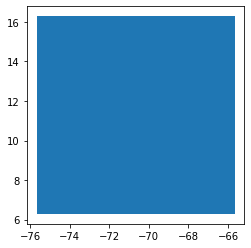

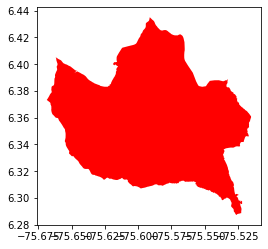

In [6]:
points = gpd.read_file('/Users/rafaelmateus/Desktop/Modelo_PI/data/maps/BELLO_MAPA/bello_map.shp')

xmin, ymin, xmax, ymax = points.total_bounds

length = 10
wide = 10

cols = list(np.arange(xmin, xmax + wide, wide))
rows = list(np.arange(ymin, ymax + length, length))

polygons = []
for x in cols[:-1]:
    for y in rows[:-1]:
        polygons.append(Polygon([(x,y), (x+wide, y), (x+wide, y+length), (x, y+length)]))

grid = gpd.GeoDataFrame({'geometry':polygons})
grid.plot()
points.plot(color='red')
plt.show()
#grid.to_file("grid.shp")

In [7]:
points = gpd.read_file('/Users/rafaelmateus/Desktop/Modelo_PI/data/maps/BELLO_MAPA/bello_map.shp')

xmin, ymin, xmax, ymax = points.total_bounds

n_cells=30
cell_size = (xmax-xmin)/n_cells

crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs"

grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'])
                                 #crs=crs)

In [8]:
cell

,geometry
0,"POLYGON ((-75.67385 6.28717, -75.67385 6.29230..."
1,"POLYGON ((-75.67385 6.29230, -75.67385 6.29742..."
2,"POLYGON ((-75.67385 6.29742, -75.67385 6.30255..."
3,"POLYGON ((-75.67385 6.30255, -75.67385 6.30767..."
4,"POLYGON ((-75.67385 6.30767, -75.67385 6.31279..."
...,...
925,"POLYGON ((-75.52012 6.41528, -75.52012 6.42040..."
926,"POLYGON ((-75.52012 6.42040, -75.52012 6.42552..."
927,"POLYGON ((-75.52012 6.42552, -75.52012 6.43065..."
928,"POLYGON ((-75.52012 6.43065, -75.52012 6.43577..."


In [9]:
type(crs)

str

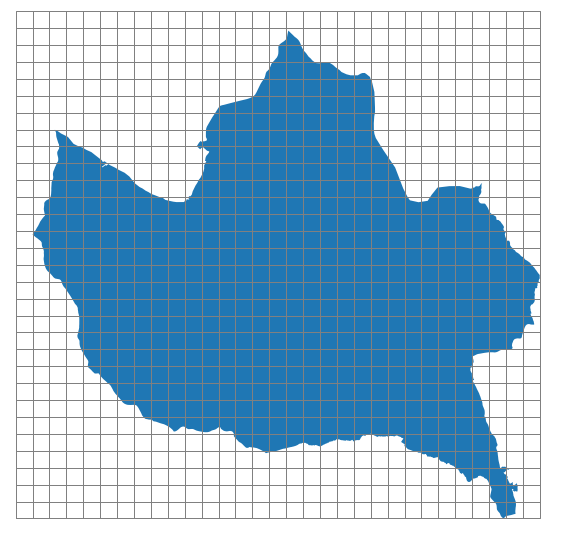

In [10]:
ax = points.plot(markersize=.1,  figsize=(10, 10))
plt.autoscale(False)
cell.plot(ax=ax, facecolor="none", edgecolor='grey')
ax.axis("off")
plt.show()

/var/folders/nv/xg8c1lkd4bq4th3rhq8nlglw0000gn/T/ipykernel_8198/3097010719.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  intersect = gpd.overlay(points, cell, how='intersection')
/var/folders/nv/xg8c1lkd4bq4th3rhq8nlglw0000gn/T/ipykernel_8198/3097010719.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersect = gpd.overlay(points, cell, how='intersection')


<AxesSubplot:>

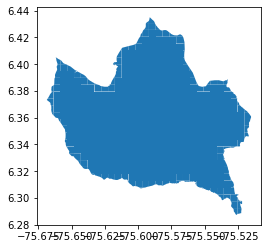

In [11]:
intersect = gpd.overlay(points, cell, how='intersection')
intersect.plot()

In [12]:
cell

,geometry
0,"POLYGON ((-75.67385 6.28717, -75.67385 6.29230..."
1,"POLYGON ((-75.67385 6.29230, -75.67385 6.29742..."
2,"POLYGON ((-75.67385 6.29742, -75.67385 6.30255..."
3,"POLYGON ((-75.67385 6.30255, -75.67385 6.30767..."
4,"POLYGON ((-75.67385 6.30767, -75.67385 6.31279..."
...,...
925,"POLYGON ((-75.52012 6.41528, -75.52012 6.42040..."
926,"POLYGON ((-75.52012 6.42040, -75.52012 6.42552..."
927,"POLYGON ((-75.52012 6.42552, -75.52012 6.43065..."
928,"POLYGON ((-75.52012 6.43065, -75.52012 6.43577..."


In [13]:
small=cell.iloc[300].values

In [14]:
cell.iloc[75]

geometry    POLYGON ((-75.66360 6.36403, -75.66360 6.36916...
Name: 75, dtype: geometry

In [15]:

big = points.geometry.values

In [16]:
small,big

(<GeometryArray>
 Length: 1, dtype: geometry,
 <GeometryArray>
 Length: 1, dtype: geometry)

In [17]:
big.contains(small)[0]

/opt/anaconda3/envs/pi_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


False

In [18]:
in_shape=[]
for i in range(len(cell)):
    small=cell.iloc[i].values
    big = points.geometry.values
    in_shape.append(big.contains(small)[0])

In [19]:
cell['in_map']=in_shape

In [20]:
grid = cell[cell.in_map==True] 
grid

,geometry,in_map
75,"POLYGON ((-75.66360 6.36403, -75.66360 6.36916...",True
76,"POLYGON ((-75.66360 6.36916, -75.66360 6.37428...",True
77,"POLYGON ((-75.66360 6.37428, -75.66360 6.37941...",True
104,"POLYGON ((-75.65847 6.35891, -75.65847 6.36403...",True
105,"POLYGON ((-75.65847 6.36403, -75.65847 6.36916...",True
...,...,...
855,"POLYGON ((-75.53037 6.36403, -75.53037 6.36916...",True
881,"POLYGON ((-75.52525 6.34354, -75.52525 6.34866...",True
882,"POLYGON ((-75.52525 6.34866, -75.52525 6.35379...",True
883,"POLYGON ((-75.52525 6.35379, -75.52525 6.35891...",True


In [21]:
# cell[75 ] in points

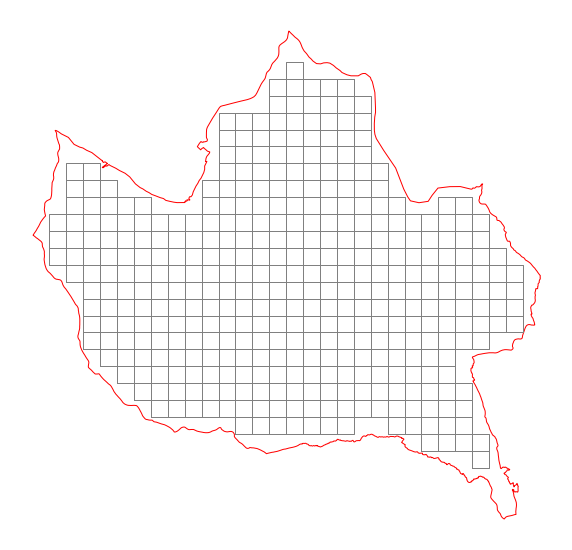

In [22]:
ax = points.plot(color='white', edgecolor='red', markersize=.1,  figsize=(10, 10))
plt.autoscale(False)
grid.plot(ax=ax, facecolor="none", edgecolor='grey')
ax.axis("off")
plt.show()

## 4.2. GIS

In [23]:
bello_map=gpd.read_file('/Users/rafaelmateus/Desktop/Modelo_PI/data/maps/BELLO_MAPA/bello_map.shp')

In [24]:
bello_map

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CSMBL,MPIO_VGNC,MPIO_TIPO,SHAPE_AREA,SHAPE_LEN,geometry
0,05,088,05088,ANTIOQUIA,BELLO,Ordenanza 48 del 29 deAbril de 1913,147.758418,4,2020,MUNICIPIO,0.012068,0.614364,"POLYGON ((-75.58203 6.42510, -75.58157 6.42507..."


In [25]:
bello_map.geometry.values

<GeometryArray>
Length: 1, dtype: geometry

In [26]:
bello_map.geometry.bounds

,minx,miny,maxx,maxy
0,-75.668723,6.287174,-75.515001,6.434998


In [27]:
xmin=bello_map.geometry.bounds.minx
ymin=bello_map.geometry.bounds.miny
xmax=bello_map.geometry.bounds.maxx
ymax=bello_map.geometry.bounds.maxy

In [28]:
xmin

0   -75.668723
Name: minx, dtype: float64

In [29]:
xrand = random.uniform(xmin, xmax)
yrand = random.uniform(ymin, ymax)
xrand.values[0], yrand.values[0]

(-75.59415660897409, 6.352238520293559)

In [30]:
random_points = pd.DataFrame()

random_x=[]
random_y=[]

for i in range(500):
    xrand = random.uniform(xmin, xmax)
    yrand = random.uniform(ymin, ymax)
    point=Point(xrand.values[0], yrand.values[0])
    if bello_map.geometry.contains(point).values[0]==True:
        random_x.append(xrand.values[0])
        random_y.append(yrand.values[0])


random_points['x']=random_x
random_points['y']=random_y
random_points

,x,y
0,-75.586416,6.406670
1,-75.572516,6.334073
2,-75.662488,6.372580
3,-75.536885,6.346859
4,-75.601317,6.397055
...,...,...
282,-75.587437,6.348064
283,-75.587259,6.397016
284,-75.581426,6.340487
285,-75.580377,6.399657


In [31]:
puntos = gpd.GeoDataFrame(random_points, geometry=gpd.points_from_xy(random_points.x, random_points.y))

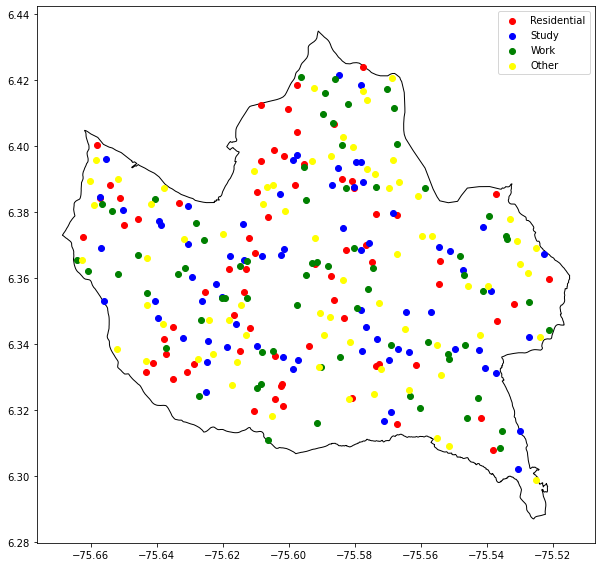

In [32]:
n1=len(random_points)//4
n2=len(random_points)//2
n3=3*len(random_points)//4

ax = bello_map.plot(color='white', edgecolor='black', figsize=(10, 10))
puntos[:n1-1].plot(ax=ax, color='red', label='Residential')
puntos[n1:n2-2].plot(ax=ax, color='blue', label='Study')
puntos[n2:n3-1].plot(ax=ax, color='green', label='Work')
puntos[n3:].plot(ax=ax, color='yellow', label='Other')
ax.legend()
plt.show()
ax.figure.savefig('mapa.png')

In [33]:
xrand = random.uniform(xmin, xmax)
yrand = random.uniform(ymin, ymax)
xrand.values[0], yrand.values[0]

(-75.59252525335937, 6.33324017823986)

In [34]:
type(xrand.values[0])

numpy.float64

In [35]:
xrand = random.uniform(xmin, xmax)
yrand = random.uniform(ymin, ymax)
Point(xrand,yrand).within(bello_map.geometry.values)

AttributeError: 'GeometryArray' object has no attribute '_geom'

# Model Implementation